In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [14]:
# connect your google drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
fer2013_dataset_file_path = 'drive/My Drive/Project/fer2013.csv'

In [16]:
train_images = []
train_labels = []

val_images = []
val_labels = []

test_images = []
test_labels = []

with open(fer2013_dataset_file_path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row_id, row in enumerate(csv_reader):
    if row_id == 0:
      continue
    label = np.zeros(7)
    label[int(row[0])] = 1

    image = list(map(int, row[1].split(' ')))
    
    if row[2] == 'Training':
      train_labels.append(label)
      train_images.append(image)
    elif row[2] == 'PublicTest':
      test_labels.append(label)
      test_images.append(image)
    elif row[2] == 'PrivateTest':
      val_labels.append(label)
      val_images.append(image)

train_labels = np.asarray(train_labels, dtype=np.float32)
train_images = np.asarray(train_images, dtype=np.float32).reshape(-1, 48, 48, 1)

val_labels = np.asarray(val_labels, dtype=np.float32)
val_images = np.asarray(val_images, dtype=np.float32).reshape(-1, 48, 48, 1)

test_labels = np.asarray(test_labels, dtype=np.float32)
test_images = np.asarray(test_images, dtype=np.float32).reshape(-1, 48, 48, 1)


In [17]:
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)

print('Val images:', val_images.shape)
print('Val labels:', val_labels.shape)

print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: (28709, 48, 48, 1)
Train labels: (28709, 7)
Val images: (3589, 48, 48, 1)
Val labels: (3589, 7)
Test images: (3589, 48, 48, 1)
Test labels: (3589, 7)


In [18]:
# normalization
train_images /= 255
val_images /= 255
test_images /= 255

In [19]:
emotions = {
    0: 'Angry', 
    1: 'Disgust',
    2: 'Fear', 
    3: 'Happy',
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'
}

Label array: [0. 0. 0. 1. 0. 0. 0.] 
Label: 3 
Emotion: Happy 
Image shape: (48, 48, 1)


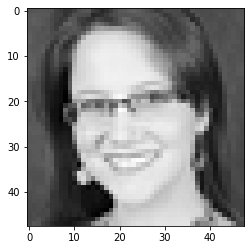

In [20]:
index = 7
print('Label array:', train_labels[index], '\nLabel:', np.argmax(train_labels[index]),
      '\nEmotion:', emotions[np.argmax(train_labels[index])],
      '\nImage shape:', train_images[index].shape)
plt.imshow(train_images[index].reshape(48, 48), cmap='gray')
plt.show()

In [21]:
input_shape = (48, 48, 1)
num_labels = 7

num_features = 64

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 512)        

In [22]:
batch_size = 256
epochs = 20

#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

#training the model
train_history = model.fit(
    train_images, train_labels, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(val_images, val_labels), 
    verbose=1)

Epoch 1/20
113/113 [==============================] - 7s 62ms/step - loss: 1.7755 - accuracy: 0.2640 - val_loss: 1.6695 - val_accuracy: 0.3249
Epoch 2/20
113/113 [==============================] - 7s 61ms/step - loss: 1.5411 - accuracy: 0.3975 - val_loss: 1.4193 - val_accuracy: 0.4606
Epoch 3/20
113/113 [==============================] - 7s 62ms/step - loss: 1.3539 - accuracy: 0.4837 - val_loss: 1.2712 - val_accuracy: 0.5166
Epoch 4/20
113/113 [==============================] - 7s 62ms/step - loss: 1.2401 - accuracy: 0.5299 - val_loss: 1.2029 - val_accuracy: 0.5291
Epoch 5/20
113/113 [==============================] - 7s 61ms/step - loss: 1.1790 - accuracy: 0.5559 - val_loss: 1.1390 - val_accuracy: 0.5637
Epoch 6/20
113/113 [==============================] - 7s 61ms/step - loss: 1.1129 - accuracy: 0.5780 - val_loss: 1.1068 - val_accuracy: 0.5701
Epoch 7/20
113/113 [==============================] - 7s 61ms/step - loss: 1.0601 - accuracy: 0.5993 - val_loss: 1.0751 - val_accuracy: 0.5968

In [23]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')

113/113 [==============================] - 1s 5ms/step - loss: 1.1570 - accuracy: 0.6255
Loss: 1.1569695472717285 
Accuracy: 62.55224347114563 %
